In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
from scipy import stats

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [2]:
#df_PAT = pd.read_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\Models\Time series models\TS_data_sum_MONPAT_allCols.csv")
#df_SAL['PERPAI'] = pd.to_datetime(df_SAL['PERPAI'], format='%d/%m/%Y')
#df_PAT['PERPAI'] = pd.to_datetime(df_PAT['PERPAI'], format='%d/%m/%Y')

In [10]:
df_PAT = pd.read_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\Models\Time series models\MONPAT.csv")
df_SAL = pd.read_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\Models\Time series models\MONSAL.csv")

In [31]:
df_PAT = pd.read_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\1. Data Cleaning\Payroll\all_PAT.csv")
df_SAL = pd.read_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\1. Data Cleaning\Payroll\all_SAL.csv")
df_PAT['PERPAI'] = pd.to_datetime(df_PAT['PERPAI'], format='%Y-%m-%d')
df_SAL['PERPAI'] = pd.to_datetime(df_SAL['PERPAI'], format='%Y-%m-%d')
df_SAL = df_SAL.sort_values(by='PERPAI', ascending=False)
df_PAT = df_PAT.sort_values(by='PERPAI', ascending=False)

In [33]:
def plot_many(List_names,s=1,p=0):
    l_p=[]
    l_s=[]
    for col in List_names :
        l_s.append(pd.Series(list(df_SAL[col]), index=list(df_SAL['PERPAI'])))
        l_p.append(pd.Series(list(df_PAT[col]), index=list(df_PAT['PERPAI'])))

    plt.subplots(1, 1, figsize=(25, 10))
    
    if s==1 & p==1 : 
        for i in range(len(l_s)) : 
            plt.plot(l_s[i],label=List_names[i]+'_SAL')
            plt.plot(l_p[i],label=List_names[i]+'_PAT')
            
    elif s==1 :
         for i in range(len(l_s)) : 
            plt.plot(l_s[i],label=List_names[i])
            
        
    elif p==1 :
         for i in range(len(l_p)) : 
            plt.plot(l_p[i],label=List_names[i])

    plt.legend()
    plt.show()
            

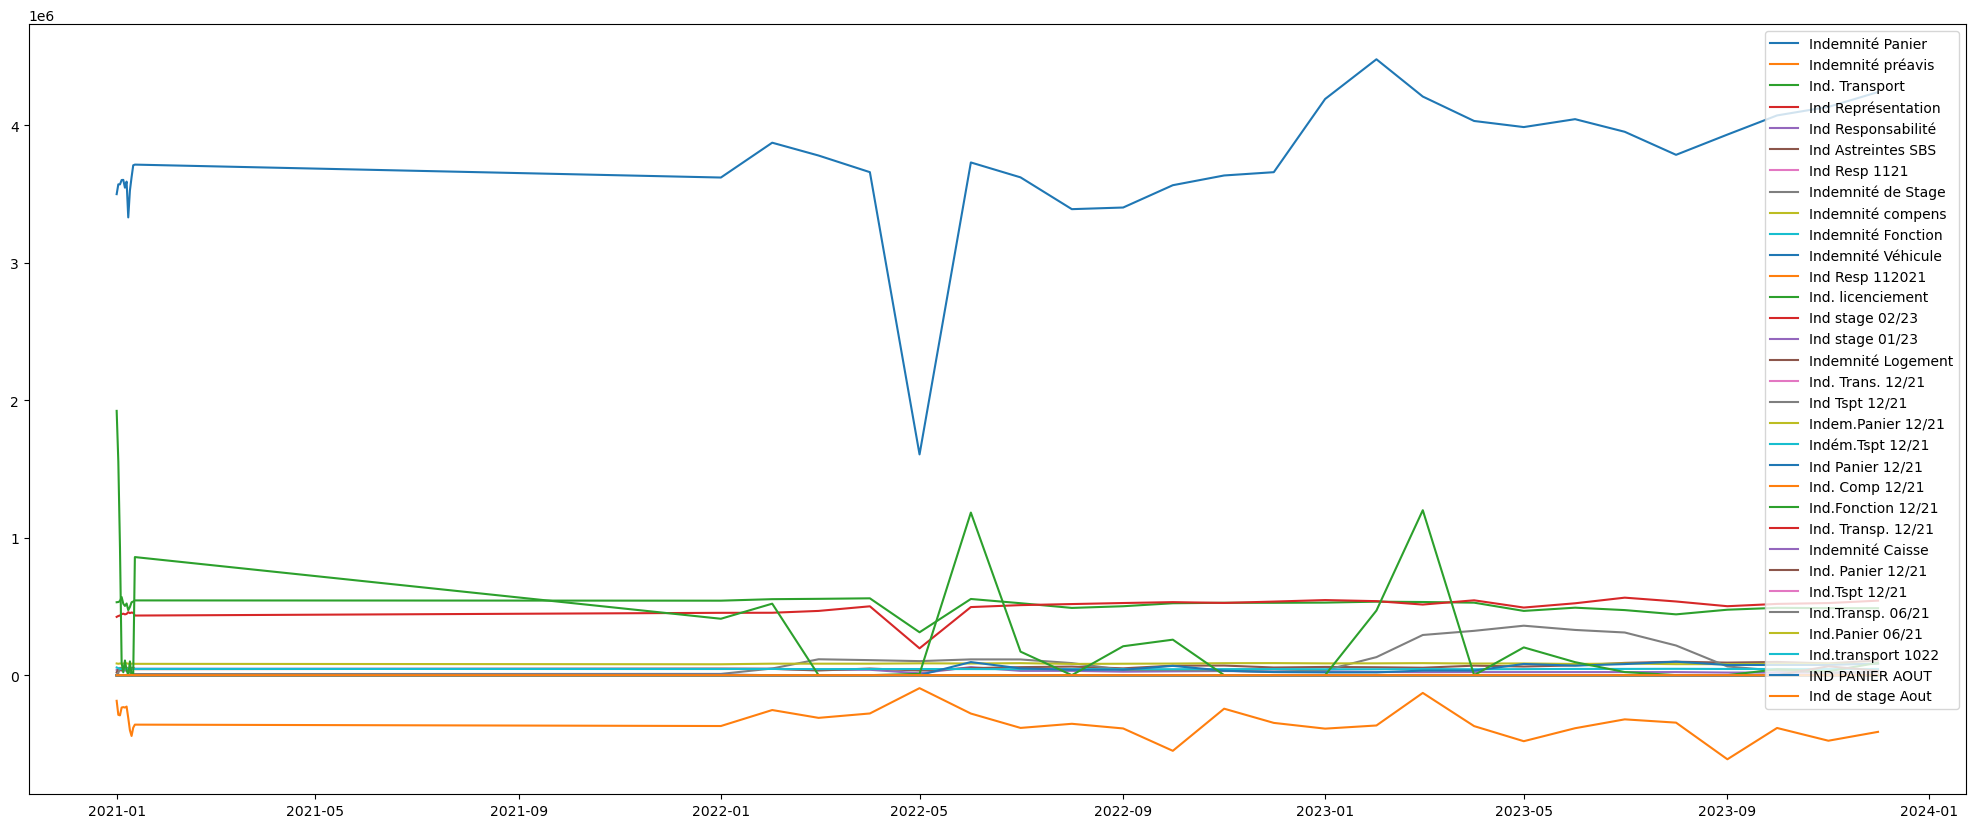

In [34]:
plot_many(L_Indemnité[:],s=1,p=0)

In [13]:
l_cols = df_PAT.columns

In [14]:
L_prime = []
for col in df_SAL.columns :
    if col[:5].lower() == 'prime' or  col[:2].lower() == 'p.':
        L_prime.append(col)

l_cols_1 = [col for col in l_cols if col not in L_prime]

In [15]:
L_Indemnité = []
for col in l_cols_1 :
    if col[:3].lower() == 'ind' :
        L_Indemnité.append(col)
        
l_cols_2 = [col for col in l_cols_1 if col not in L_Indemnité]

In [16]:
len(L_prime)
len(L_Indemnité)

32

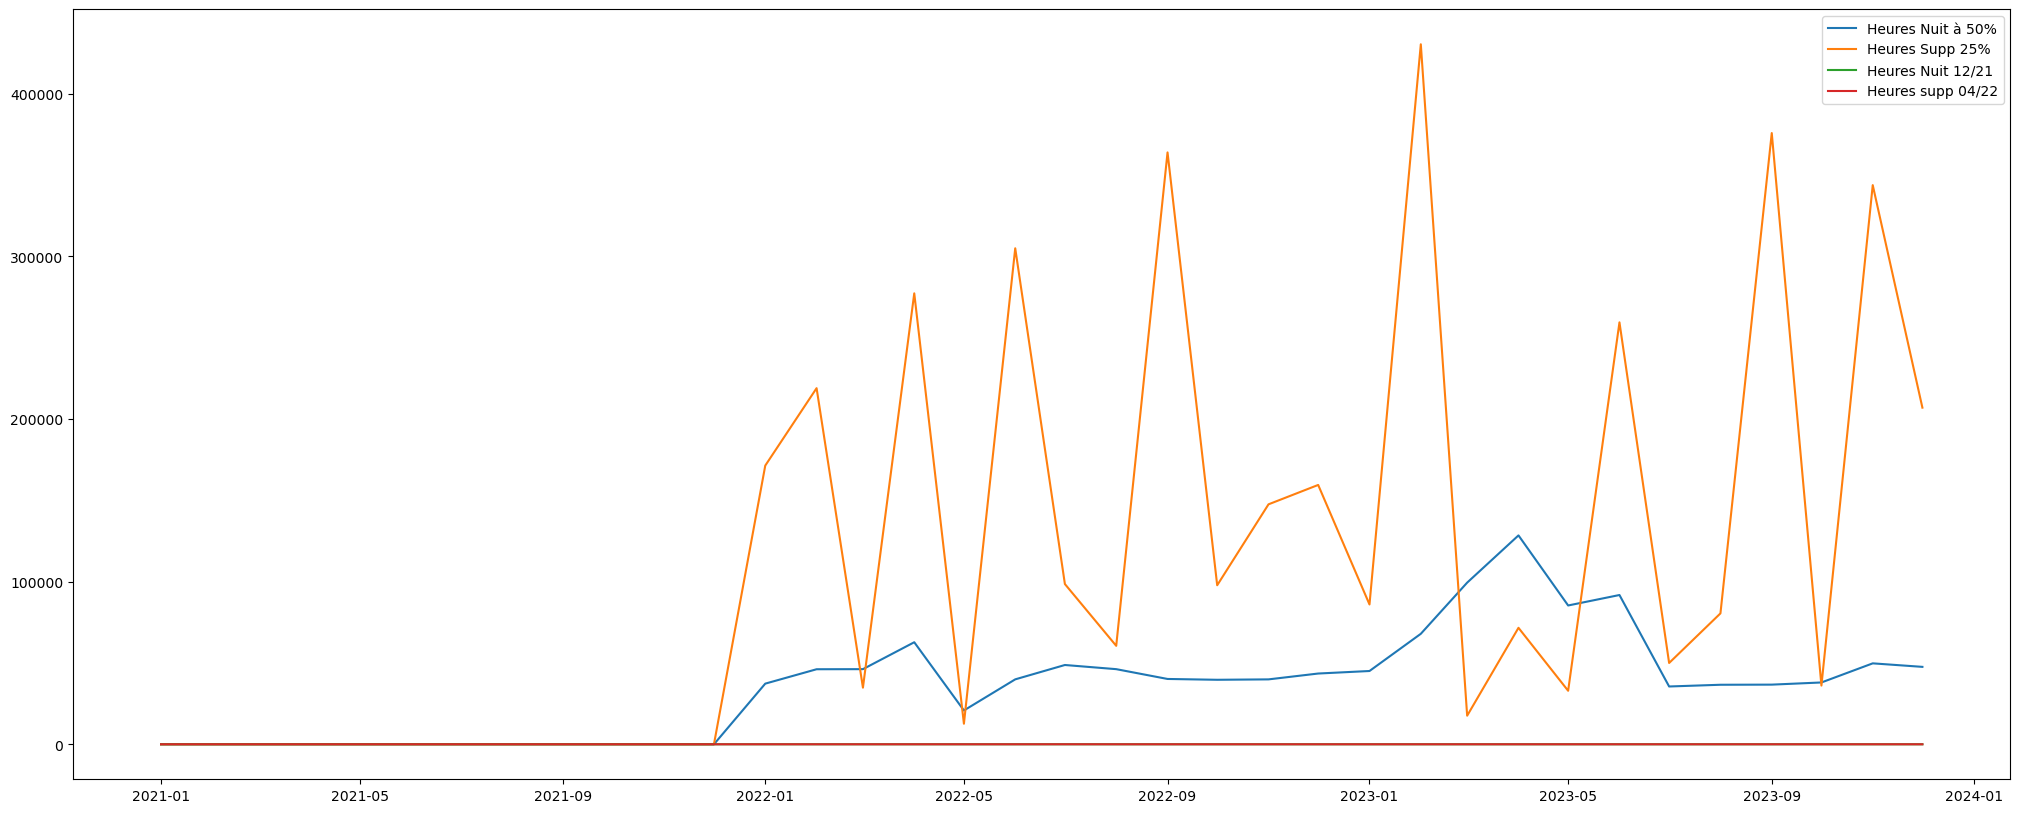

In [35]:
plot_many(['Heures Nuit à 50%','Heures Supp 25%','Heures Nuit 12/21','Heures supp 04/22'],s=0,p=1)

# I. Recruitment Budget Study & Forecast

Text(0.5, 1.0, 'Montant Patronal - Net A Payer')

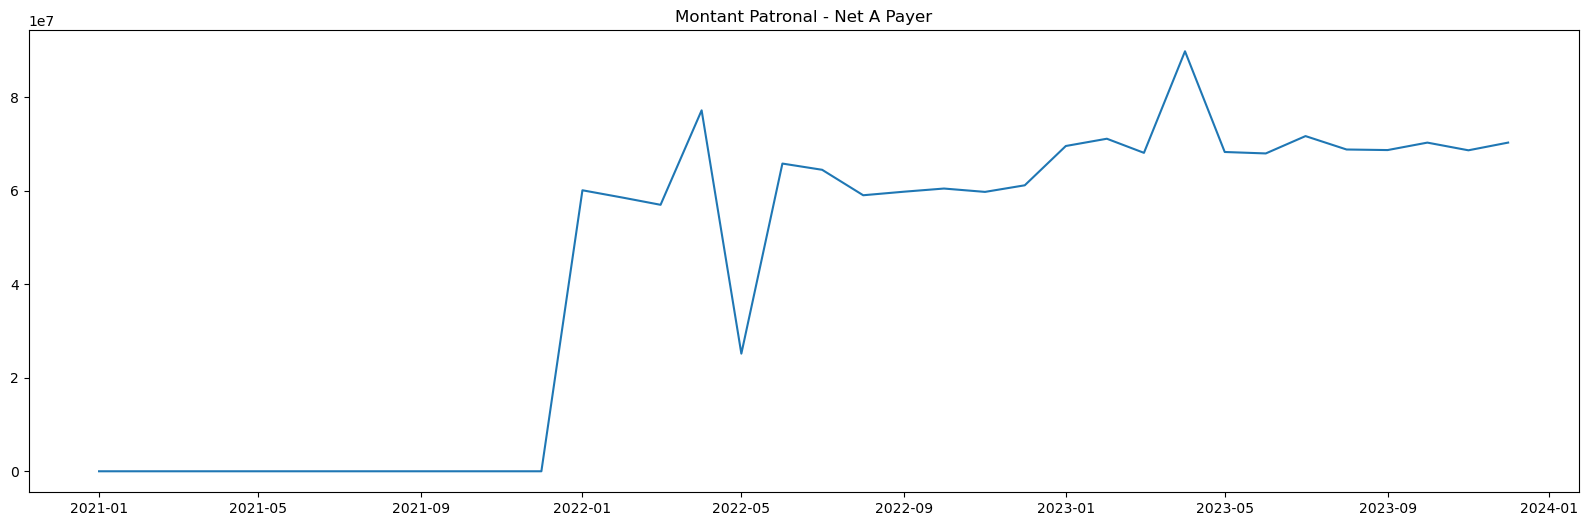

In [36]:
plt.subplots(1, 1, figsize=(20, 6))
data = pd.Series(list(df_PAT['Net à payer']), index=list(df_PAT['PERPAI']))


plt.plot(data)
#plt.plot(data1)
plt.title('Montant Patronal - Net A Payer')

In [34]:
predict_start_date = pd.to_datetime('2023-06-01')
predict_end_date = pd.to_datetime('2023-12-01')

df_tr = df_PAT[df_PAT['PERPAI'] < predict_start_date]
df_forecast = df_PAT[df_PAT['PERPAI'] >= predict_start_date]

data_train = pd.Series(list(df_tr['Net à payer']), index=list(df_tr['PERPAI'] ))
data_forecast = pd.Series(list(df_forecast['Net à payer']), index=list(df_forecast['PERPAI'] ))

In [41]:
train_index = pd.date_range(start=data_train.index[0], end=data_train.index[-1], freq='MS')
forecast_index = pd.date_range(start=data_forecast.index[0], end=predict_end_date, freq='MS')

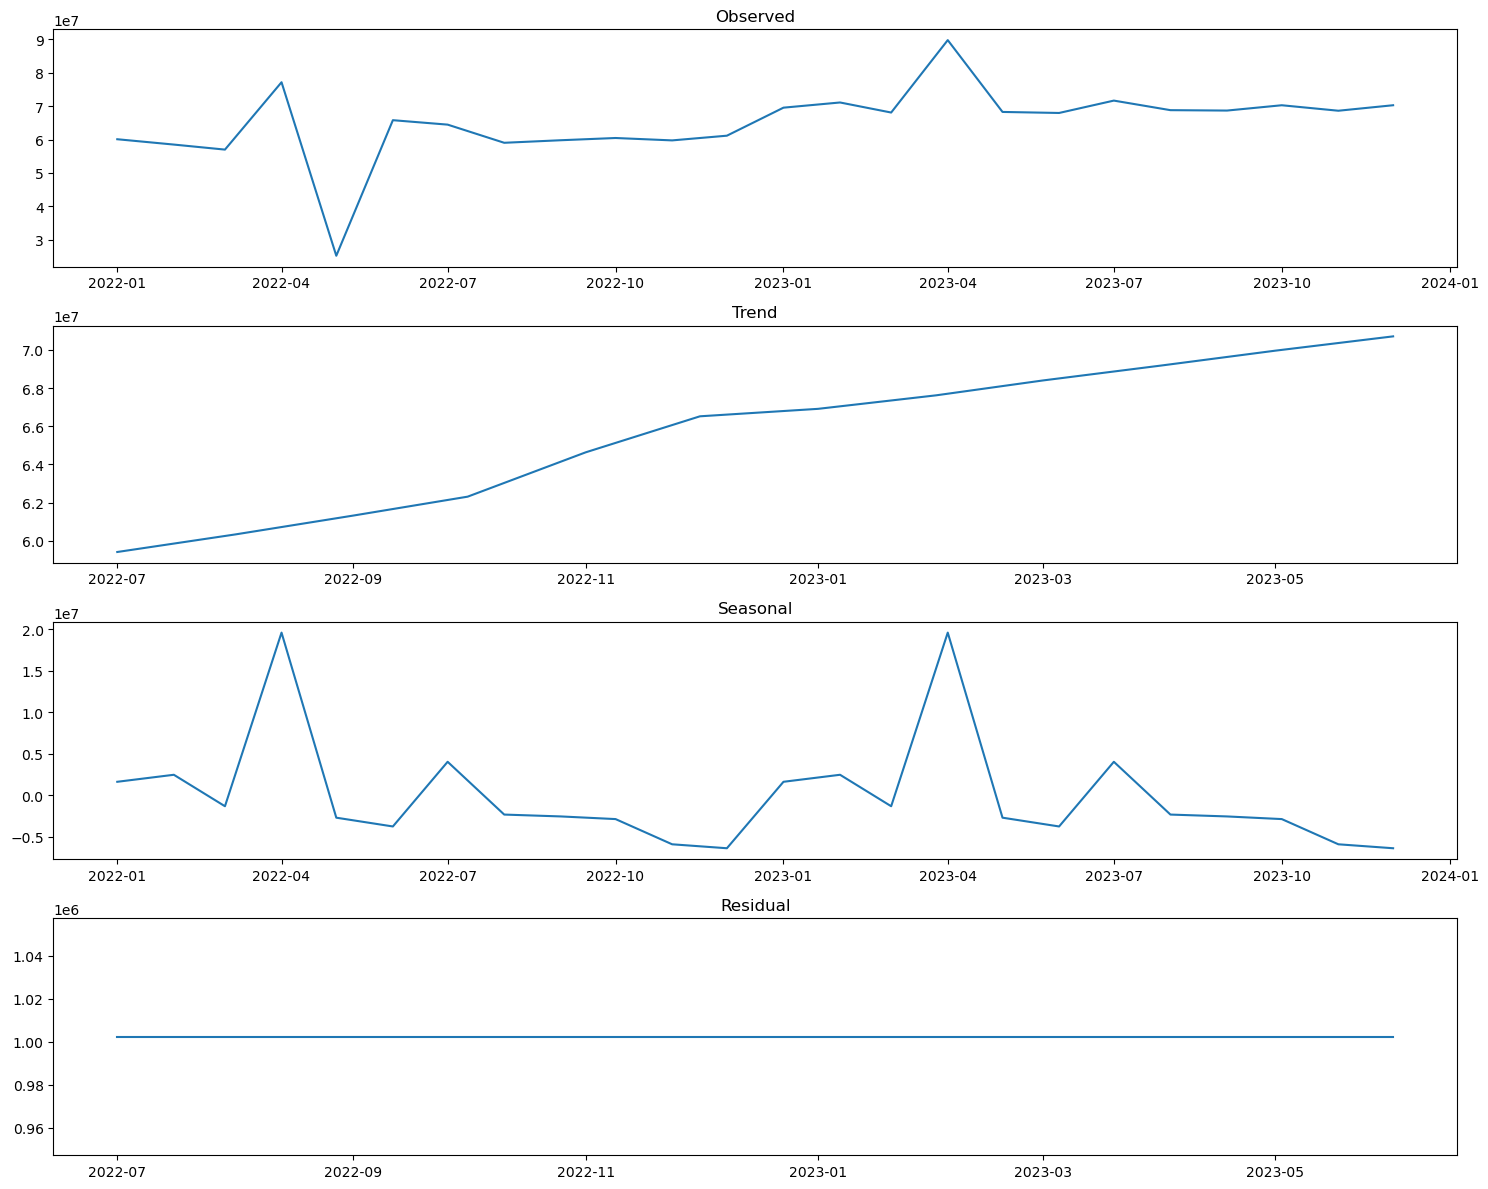

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
result = seasonal_decompose(data, model='additive', period=12)  # Assuming daily seasonality for hourly data

# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(15, 12))

# Plot observed data
axes[0].plot(result.observed)
axes[0].set_title('Observed')

# Plot trend data
axes[1].plot(result.trend)
axes[1].set_title('Trend')

# Plot seasonal data
axes[2].plot(result.seasonal)
axes[2].set_title('Seasonal')

# Plot residual data
axes[3].plot(result.resid)
axes[3].set_title('Residual')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [16]:
#plt.subplots(1, 1, figsize=(10, 6))

# Plot autocorrelation in the top-left subplot
#plot_acf(data, lags=23)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [17]:
#plt.subplots(1, 1, figsize=(10, 6))

# Plot autocorrelation in the top-left subplot
#plot_pacf(data, lags=20)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

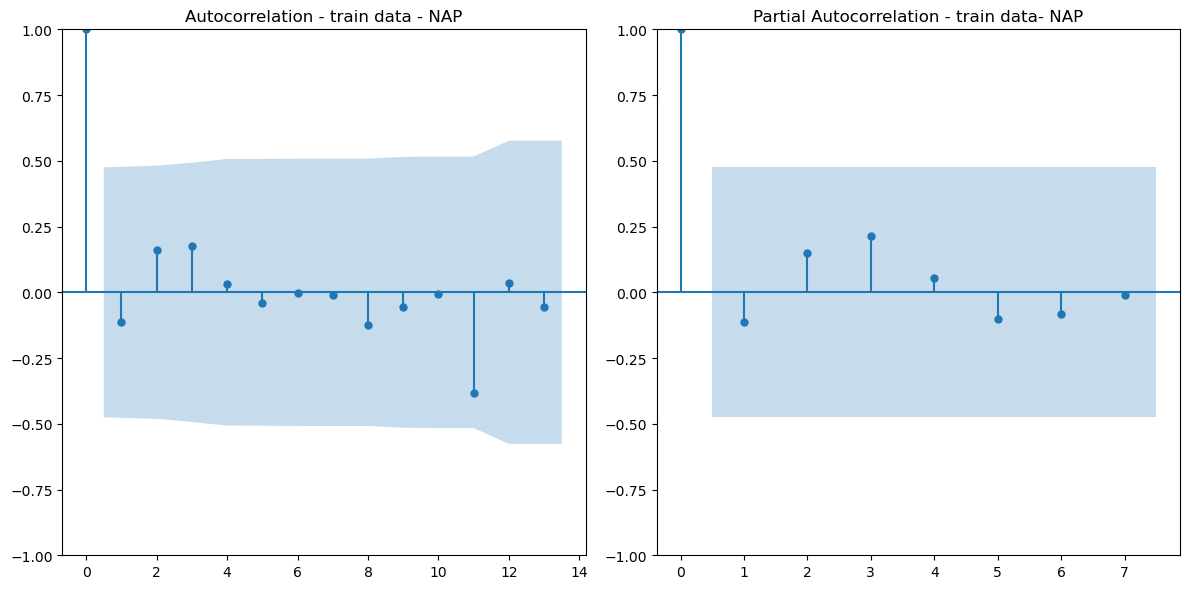

In [18]:
# Calculate the ACF (via statsmodel)
#plot_acf(data)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot autocorrelation in the top-left subplot
plot_acf(data_train, ax=axes[0])
axes[0].set_title('Autocorrelation - train data - NAP')

# Plot partial autocorrelation in the top-right subplot
plot_pacf(data_train, ax=axes[1], lags=7)  
axes[1].set_title('Partial Autocorrelation - train data- NAP')


plt.tight_layout()
plt.show()

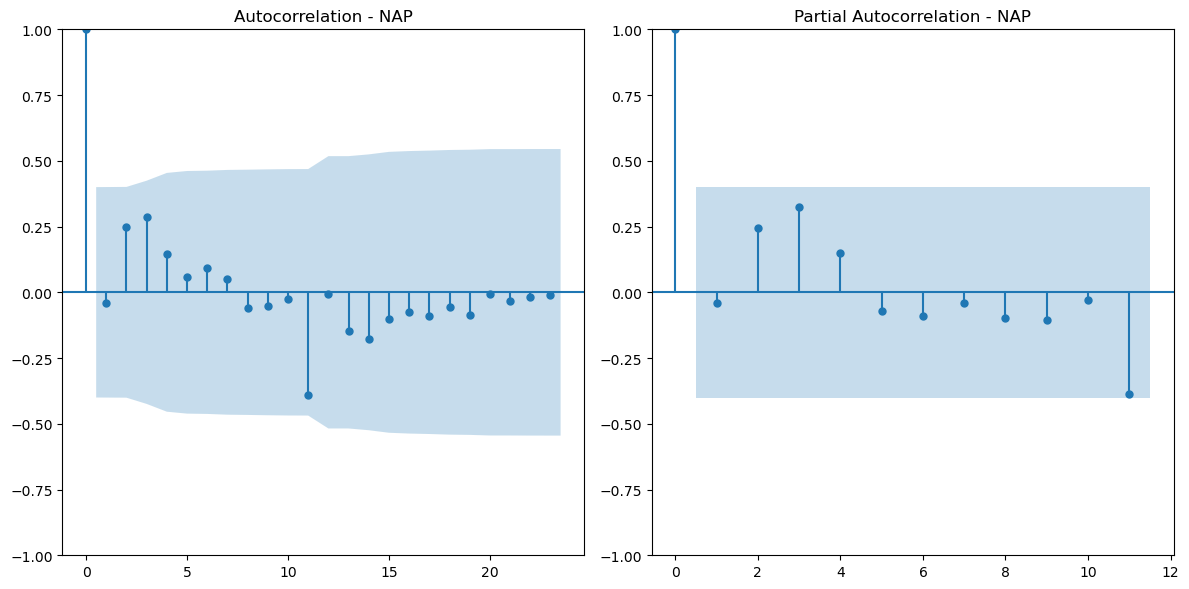

In [19]:
# Calculate the ACF (via statsmodel)
#plot_acf(data)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot autocorrelation in the top-left subplot
plot_acf(data, ax=axes[0], lags=23)
axes[0].set_title('Autocorrelation - NAP')

# Plot partial autocorrelation in the top-right subplot
plot_pacf(data, ax=axes[1], lags=11)  
axes[1].set_title('Partial Autocorrelation - NAP')


plt.tight_layout()
plt.show()

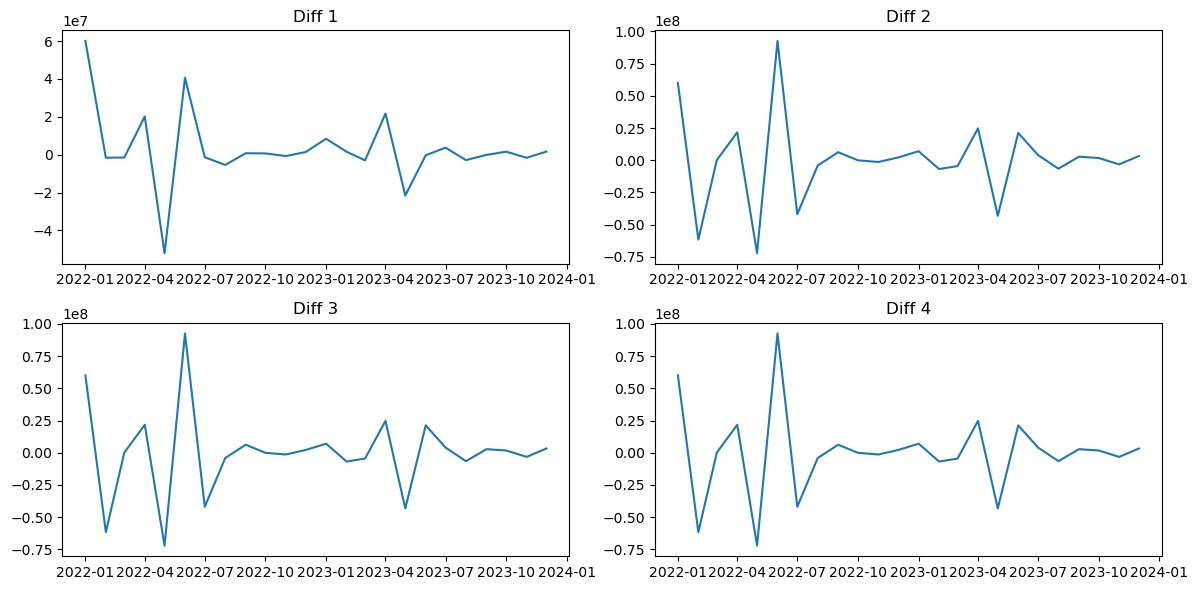

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# Calculate the first and second differenced data
data_diff = data.diff().fillna(data_train)
data_diff2 = data_diff.diff().fillna(data_diff)
data_diff3 = data_diff.diff().fillna(data_diff2)
data_diff4 = data_diff.diff().fillna(data_diff3)

axes[0, 0].plot(data_diff)
axes[0, 0].set_title('Diff 1')

# Plot second differenced data on the second subplot
axes[0, 1].plot(data_diff2)
axes[0, 1].set_title('Diff 2')

# Plot third differenced data on the third subplot
axes[1, 0].plot(data_diff3)
axes[1, 0].set_title('Diff 3')

# Plot fourth differenced data on the fourth subplot
axes[1, 1].plot(data_diff4)
axes[1, 1].set_title('Diff 4')


# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [21]:
'''
plt.subplots(1, 1, figsize=(12, 6))

data_diff=data.diff().fillna(data)
data_diff2=data.diff().fillna(data_diff)
plt.plot(data_diff2)

plt.title('Differenced')
plt.show()
'''

"\nplt.subplots(1, 1, figsize=(12, 6))\n\ndata_diff=data.diff().fillna(data)\ndata_diff2=data.diff().fillna(data_diff)\nplt.plot(data_diff2)\n\nplt.title('Differenced')\nplt.show()\n"

In [22]:
from statsmodels.tsa.stattools import adfuller

def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [23]:
perform_adf_test(data_diff)
perform_adf_test(data_diff2)
perform_adf_test(data_diff3)
perform_adf_test(data_diff4)

ADF Statistic: -7.191391
p-value: 0.000000
ADF Statistic: -1.079392
p-value: 0.723220
ADF Statistic: -1.079392
p-value: 0.723220
ADF Statistic: -1.079392
p-value: 0.723220


We will be choosing order 3 differencing, since it gives 

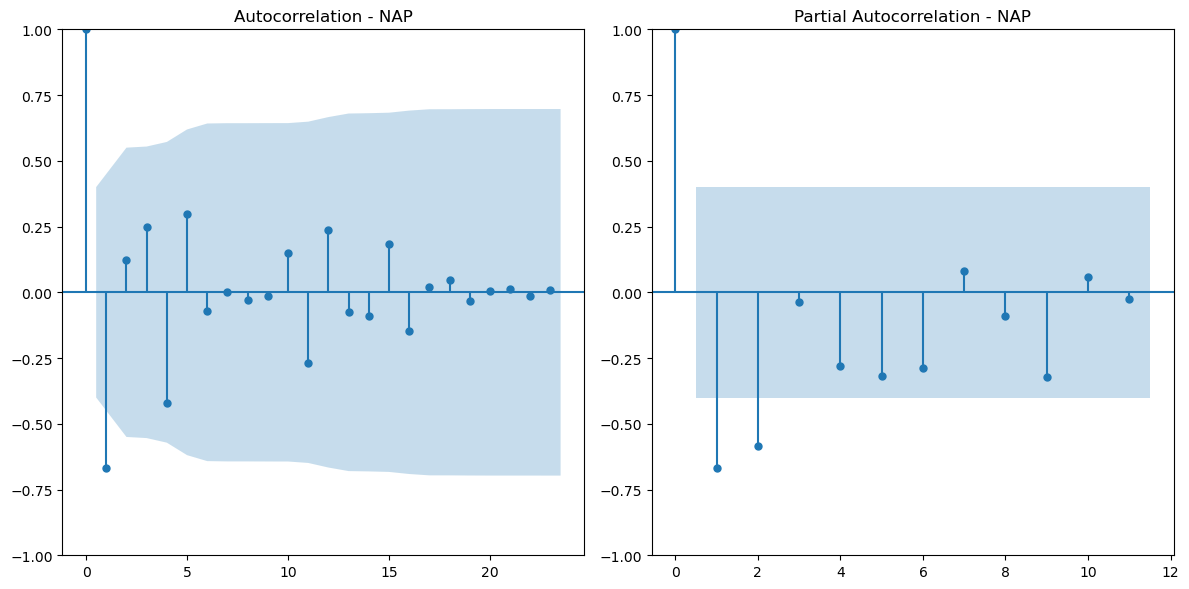

In [24]:
# Calculate the ACF (via statsmodel)
#plot_acf(data)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot autocorrelation in the top-left subplot
plot_acf(data_diff4, ax=axes[0], lags=23)
axes[0].set_title('Differenced Autocorrelation - NAP')

# Plot partial autocorrelation in the top-right subplot
plot_pacf(data_diff4, ax=axes[1], lags=11)  
axes[1].set_title('Differenced Partial Autocorrelation - NAP')


plt.tight_layout()
plt.show()

In [102]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(data_train, order=(2,4,2), seasonal_order=(1,0,1,11))
model_fit = model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [103]:
print(model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                   17
Model:             SARIMAX(2, 4, 2)x(1, 0, [1], 11)   Log Likelihood                -240.707
Date:                              Wed, 22 May 2024   AIC                            495.414
Time:                                      10:16:13   BIC                            499.369
Sample:                                  01-01-2022   HQIC                           494.601
                                       - 05-01-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8835      0.436     -2.027      0.043      -1.738      -0.029
ar.L2         -0.31

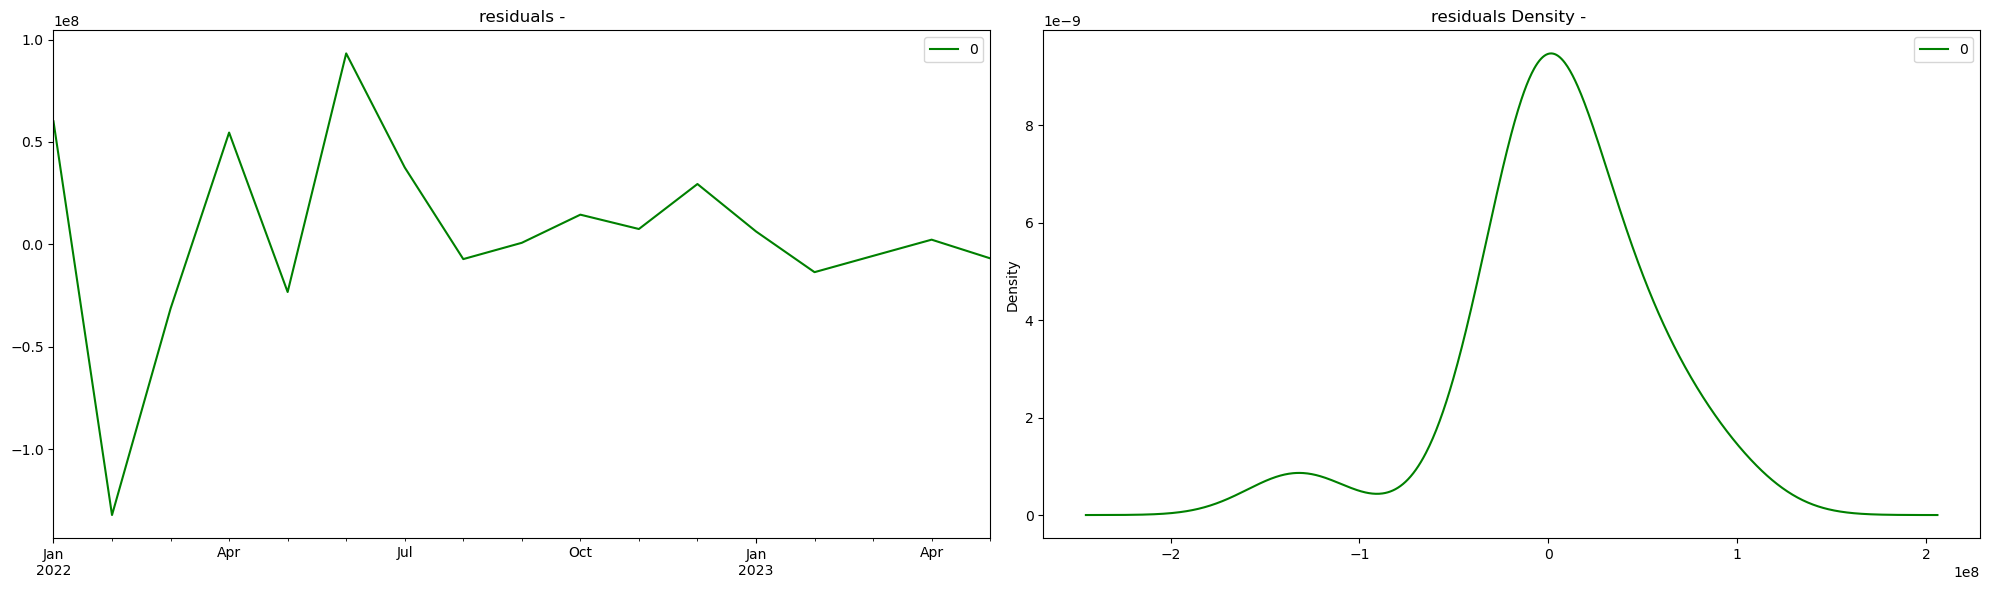

In [104]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(ax=axes[0],c='g')
axes[0].set_title('residuals -')

# density plot of residuals
residuals.plot(kind='kde',ax=axes[1],c='g')
axes[1].set_title('residuals Density - ')

plt.tight_layout()
plt.show()

In [105]:
# summary stats of residuals
print(residuals.describe())

                  0
count  1.700000e+01
mean   5.079703e+06
std    4.791058e+07
min   -1.321280e+08
25%   -7.186357e+06
50%    2.296600e+06
75%    2.946296e+07
max    9.321981e+07


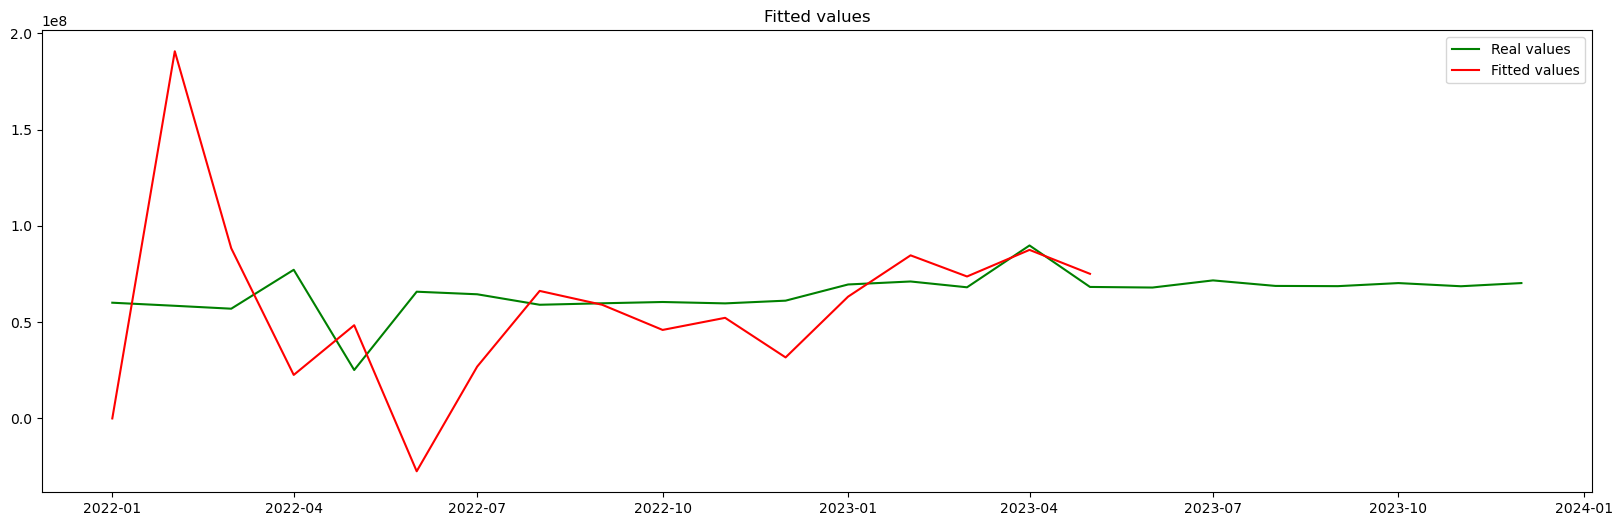

In [106]:
plt.subplots(1, 1, figsize=(20, 6))

plt.plot(data,color='g')
plt.plot(model_fit.fittedvalues, color='r')
plt.title('Fitted values')
plt.legend(['Real values','Fitted values'])

plt.show()

In [107]:
forecast = model_fit.predict(start=forecast_index[0], end=forecast_index[-1])

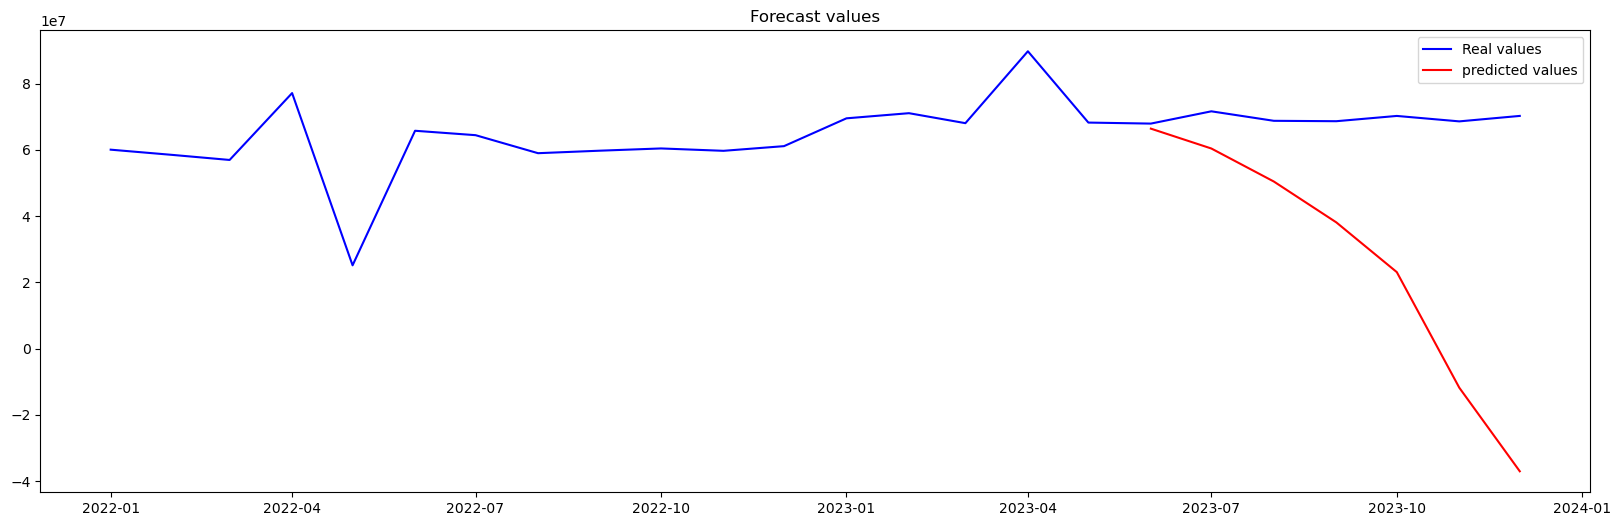

In [108]:
plt.subplots(1, 1, figsize=(20, 6))

plt.plot(data,color='b')
plt.plot(forecast, color='r')
plt.title('Forecast values')
plt.legend(['Real values','predicted values'])

plt.show()

## Evaluate Forecast

In [ ]:
def evaluate_forecast(col, forecast):
    # compute mae
    mae_train = mean_absolute_error(train[col].values, forecast[:len(train)])
    mae_val = mean_absolute_error(val[col].values, forecast[-len(val):])

    # compute mse
    mse_train = mean_squared_error(train[col].values, forecast[:len(train)])
    mse_val = mean_squared_error(val[col].values, forecast[-len(val):])

    # compute mean_absolute_percentage_error
    mape_train = mean_absolute_percentage_error(train[col].values, forecast[:len(train)])
    mape_val = mean_absolute_percentage_error(val[col].values, forecast[-len(val):])

    # make a df to store the results
    df = pd.DataFrame({'mae': [mae_train, mae_val], 'mse': [mse_train, mse_val], 'mape': [mape_train, mape_val]}, index=['train', 'val'])
    return df